<a href="https://colab.research.google.com/github/devyadav11/ML_tryouts/blob/main/anomaly__detaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow Version: 2.19.0
Found 62 files belonging to 2 classes.
Using 50 files for training.
Found 62 files belonging to 2 classes.
Using 12 files for validation.
Class Names: ['defect', 'non_defect']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.7978 - loss: 0.5082 - precision: 0.7978 - recall: 1.0000 - val_accuracy: 0.9167 - val_loss: 0.3036 - val_precision: 0.9167 - val_recall: 1.0000
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8378 - loss: 0.5061 - precision: 0.8310 - recall: 1.0000 - val_accuracy: 0.9167 - val_loss: 0.2881 - val_precision: 0.9167 - val_recall: 1.0000
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.7978 - loss: 0.4847 - precision: 0.7978 - recall: 1.0000 - val_accuracy: 0.9167 - val_loss: 0.2763 - val_precision: 0.9167 - val_recall: 1.0000
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8111 - loss: 0.5063 - precision: 0.8084 - recall: 1.0000 - val_accuracy: 0.9167 - val_loss: 0.2685 - val_precision: 0.9167 - val_recall: 1.0000
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.7937 - loss: 0.4545 - precision: 0.7887 - recall: 1.0000 - val_accuracy: 0.9167 - val_loss: 0.2628 - val_precision: 0.

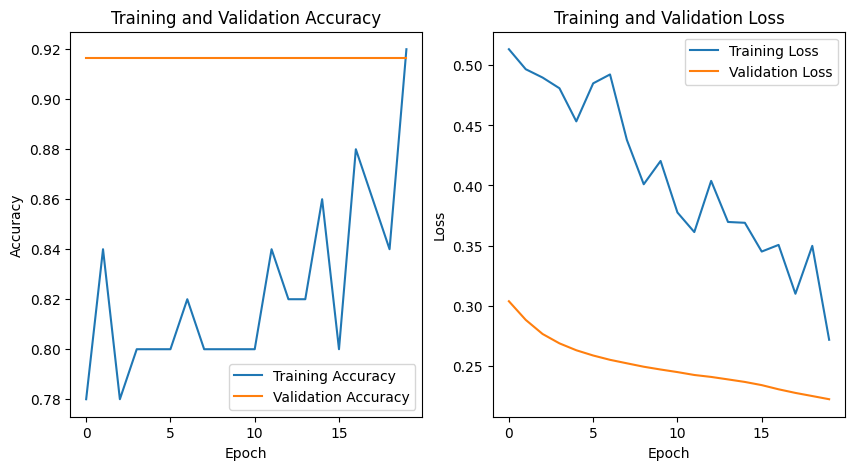

In [31]:
#
# ==============================================================================
# AI MODEL FOR DEFECTIVE VS. NON-DEFECTIVE IMAGE CLASSIFICATION
# ==============================================================================
#

# ---------------------------------
# 1. SETUP AND IMPORTS
# ---------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import os

print("TensorFlow Version:", tf.__version__)

# To run in Colab, you might need to mount your Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# DATA_DIR = '/content/drive/MyDrive/dataset/' # Update this path

# For local execution, define the path to your dataset
# Ensure your dataset is structured as DATA_DIR/train/... and DATA_DIR/validation/...
# Removed redundant unzipping and DATA_DIR setting as they are handled in other cells.
# The DATA_DIR variable is expected to be set before this cell is run.

# ---------------------------------
# 2. DATA LOADING AND PREPROCESSING
# ---------------------------------
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR, # Corrected: Use DATA_DIR directly, not join with 'train'
  validation_split=0.2, # We will use 20% of the training data for validation
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR, # Corrected: Use DATA_DIR directly, not join with 'train'
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE
)

# Get class names (should be ['defective', 'non_defective'])
class_names = train_ds.class_names
print("Class Names:", class_names)

# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ---------------------------------
# 3. DATA AUGMENTATION
# ---------------------------------
# Create a data augmentation layer to improve model robustness
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
  ],
  name="data_augmentation"
)

# ---------------------------------
# 4. MODEL BUILDING (TRANSFER LEARNING)
# ---------------------------------
# Load the pre-trained MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, # Exclude the final classification layer
                                               weights='imagenet')

# Freeze the convolutional base to prevent its weights from being updated
base_model.trainable = False

# Create the new model on top
inputs = tf.keras.Input(shape=IMG_SHAPE)
# Apply data augmentation
x = data_augmentation(inputs)
# Preprocess inputs for MobileNetV2
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
# Run the base model
x = base_model(x, training=False)
# Add our custom classification head
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x) # Dropout for regularization
x = layers.Dense(128, activation='relu')(x)
# Final output layer for binary classification
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

# ---------------------------------
# 5. COMPILE THE MODEL
# ---------------------------------
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.summary()

# ---------------------------------
# 6. TRAIN THE MODEL
# ---------------------------------
EPOCHS = 20

# Callbacks to save the best model and stop early if no improvement
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss"),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
]

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS,
  callbacks=callbacks
)

# ---------------------------------
# 7. SAVE THE FINAL TRAINED MODEL
# ---------------------------------
# The best model is already saved by ModelCheckpoint as 'best_model.keras'
# For submission, this is the file you would provide.
print("\n✅ Final model saved as 'best_model.keras'")


# ---------------------------------
# 8. VISUALIZE TRAINING RESULTS & EVALUATE
# ---------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Example of how to load the model and make a prediction
# loaded_model = tf.keras.models.load_model('best_model.keras')
#
# # Load a single image to test (replace with an actual image path)
# img_path = 'path/to/test/image.png'
# img = tf.keras.utils.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch
#
# predictions = loaded_model.predict(img_array)
# score = predictions[0][0]
#
# print(
#     f"This image is {100 * (1 - score):.2f}% defective and {100 * score:.2f}% non-defective."
# )

In [27]:
# Update the DATA_DIR variable to point to the extracted dataset
DATA_DIR = '/content/dataset/analmoly detection dataset'

# You can optionally print the contents of the extracted directory to verify
# print(os.listdir(DATA_DIR))

I've added code to unzip the dataset and updated the `DATA_DIR` variable. Now you can run the original code cell again.

In [30]:
import os

# List the contents of the directory pointed to by DATA_DIR
data_dir_path = DATA_DIR
if os.path.exists(data_dir_path):
    print(f"Contents of {data_dir_path}:")
    for item in os.listdir(data_dir_path):
        print(item)
else:
    print(f"Directory not found: {data_dir_path}")

Contents of /content/dataset/analmoly detection dataset:
non_defect
.DS_Store
defect
